Kütüphaneler hazır!
Veri Seti Boyutu: (7043, 21)


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


11 adet eksik veri temizlendi.


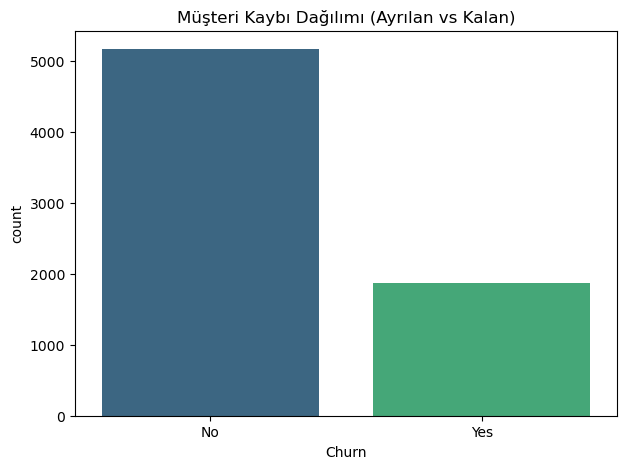

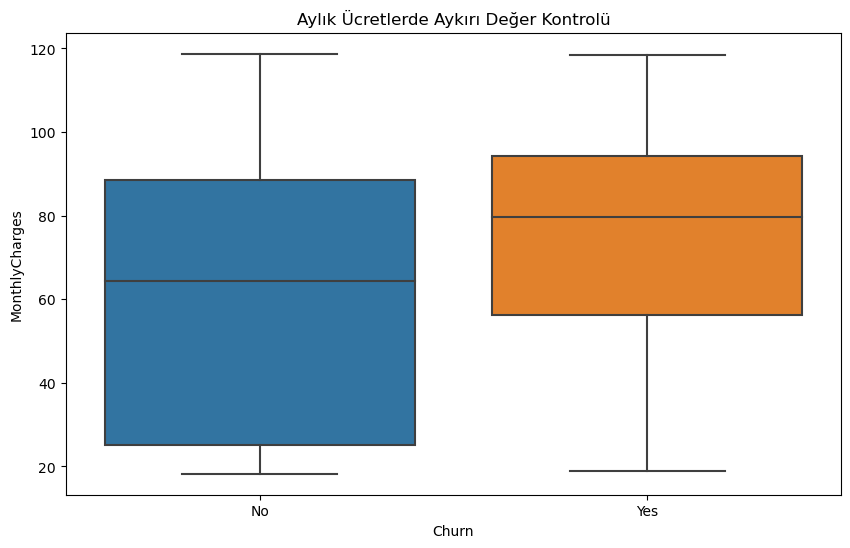

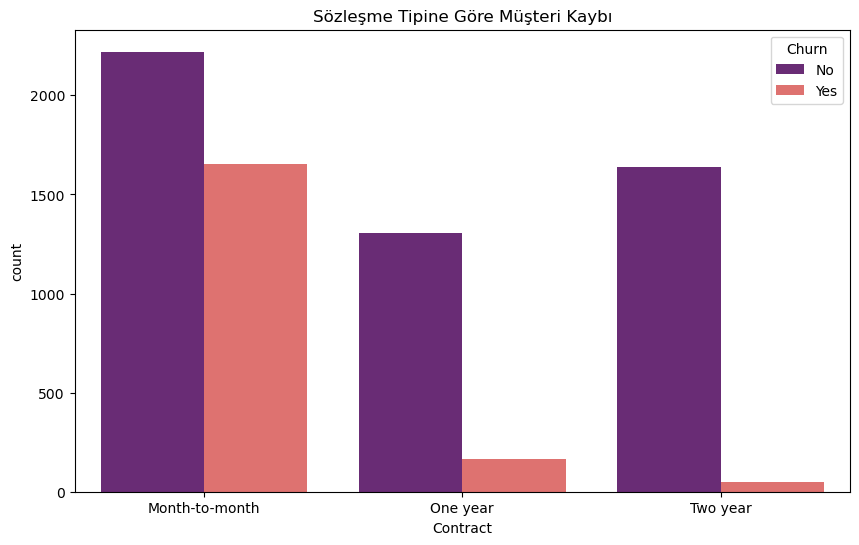

In [11]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


%matplotlib inline 

print("Kütüphaneler hazır!")

df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")

print("Veri Seti Boyutu:", df.shape)
display(df.head()) 


df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')


missing_before = df.isnull().sum().sum()
df.dropna(inplace=True)
print(f"{missing_before} adet eksik veri temizlendi.")


if 'customerID' in df.columns:
    df.drop('customerID', axis=1, inplace=True)


plt.figure(figsize=(7, 5))
sns.countplot(x='Churn', data=df, palette='viridis')
plt.title('Müşteri Kaybı Dağılımı (Ayrılan vs Kalan)')
plt.show()


plt.figure(figsize=(10, 6))
sns.boxplot(x='Churn', y='MonthlyCharges', data=df)
plt.title('Aylık Ücretlerde Aykırı Değer Kontrolü')
plt.show()

plt.figure(figsize=(10, 6))
sns.countplot(x='Contract', hue='Churn', data=df, palette='magma')
plt.title('Sözleşme Tipine Göre Müşteri Kaybı')
plt.show()

Veri eğitim için hazır hale getirildi!
Model başarıyla eğitildi!
Model Doğruluk Oranı (Accuracy): 0.79

Sınıflandırma Raporu:
               precision    recall  f1-score   support

           0       0.83      0.90      0.86      1033
           1       0.64      0.49      0.56       374

    accuracy                           0.79      1407
   macro avg       0.74      0.70      0.71      1407
weighted avg       0.78      0.79      0.78      1407



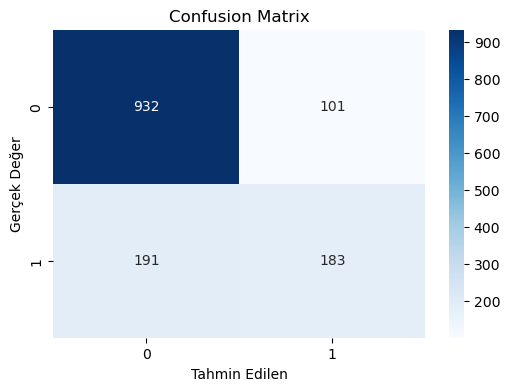

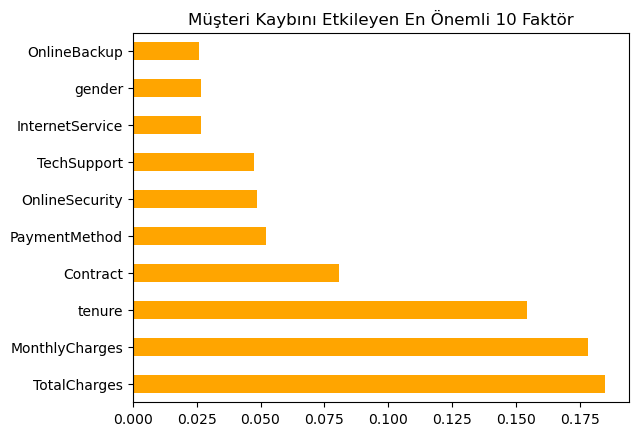

In [8]:


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df_model = df.copy()

for col in df_model.select_dtypes(include=['object']).columns:
    df_model[col] = le.fit_transform(df_model[col])


X = df_model.drop('Churn', axis=1)
y = df_model['Churn']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Veri eğitim için hazır hale getirildi!")



from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Model başarıyla eğitildi!")


print(f"Model Doğruluk Oranı (Accuracy): {accuracy_score(y_test, y_pred):.2f}")
print("\nSınıflandırma Raporu:\n", classification_report(y_test, y_pred))


plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Tahmin Edilen')
plt.ylabel('Gerçek Değer')
plt.show()

importances = pd.Series(model.feature_importances_, index=X.columns)
importances.nlargest(10).plot(kind='barh', color='orange')
plt.title('Müşteri Kaybını Etkileyen En Önemli 10 Faktör')
plt.show()


Veri eğitim için başarıyla hazır hale getirildi!
Model başarıyla eğitildi!
Model Doğruluk Oranı (Accuracy): 0.79

Ayrıntılı Sınıflandırma Raporu:
               precision    recall  f1-score   support

           0       0.83      0.90      0.86      1033
           1       0.64      0.49      0.56       374

    accuracy                           0.79      1407
   macro avg       0.74      0.70      0.71      1407
weighted avg       0.78      0.79      0.78      1407



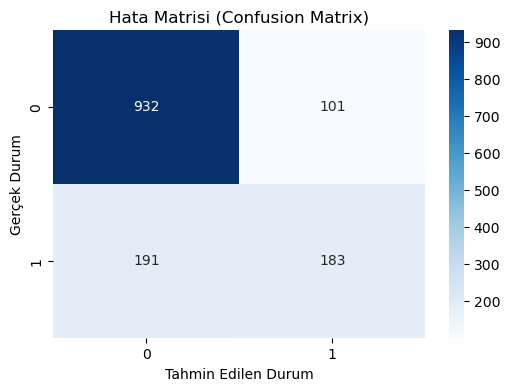

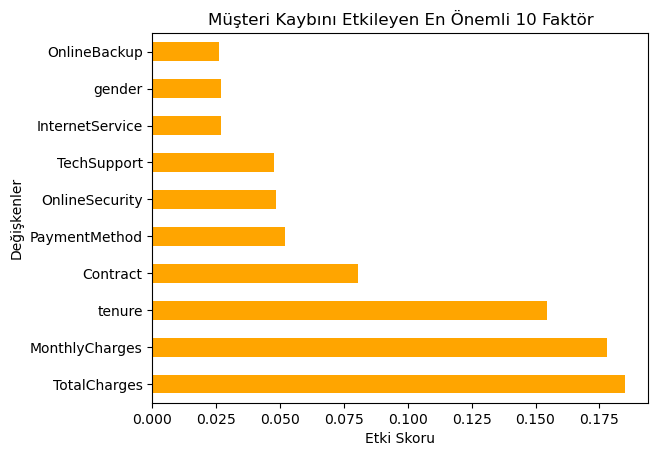

In [5]:


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df_model = df.copy()

for col in df_model.select_dtypes(include=['object']).columns:
    df_model[col] = le.fit_transform(df_model[col])

X = df_model.drop('Churn', axis=1)
y = df_model['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Veri eğitim için başarıyla hazır hale getirildi!")


from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Model başarıyla eğitildi!")

print(f"Model Doğruluk Oranı (Accuracy): {accuracy_score(y_test, y_pred):.2f}")
print("\nAyrıntılı Sınıflandırma Raporu:\n", classification_report(y_test, y_pred))

plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Hata Matrisi (Confusion Matrix)')
plt.xlabel('Tahmin Edilen Durum')
plt.ylabel('Gerçek Durum')
plt.show()

importances = pd.Series(model.feature_importances_, index=X.columns)
importances.nlargest(10).plot(kind='barh', color='orange')
plt.title('Müşteri Kaybını Etkileyen En Önemli 10 Faktör')
plt.xlabel('Etki Skoru')
plt.ylabel('Değişkenler')
plt.show()


Veriler KNN için standardize edildi.


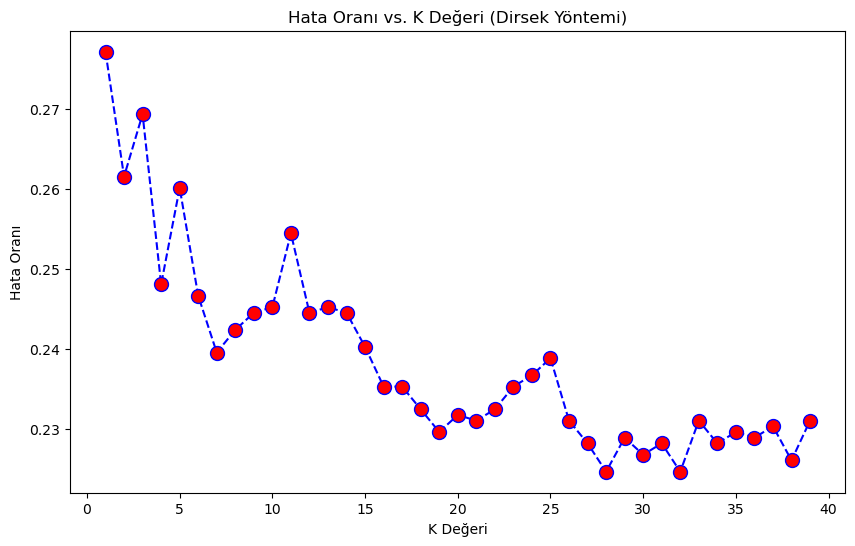

K=25 için KNN Başarısı: %76.12

Hata Matrisi (Confusion Matrix):
 [[870 163]
 [173 201]]


In [9]:


import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix


scaler = StandardScaler()

X_scaled = scaler.fit_transform(X) 


X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

print("Veriler KNN için standardize edildi.")


hata_orani = []

for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train_s, y_train_s)
    tahmin_i = knn.predict(X_test_s)
    hata_orani.append(np.mean(tahmin_i != y_test_s))

plt.figure(figsize=(10,6))
plt.plot(range(1,40), hata_orani, color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Hata Oranı vs. K Değeri (Dirsek Yöntemi)')
plt.xlabel('K Değeri')
plt.ylabel('Hata Oranı')
plt.show()

en_iyi_k = 25 
knn_final = KNeighborsClassifier(n_neighbors=en_iyi_k)
knn_final.fit(X_train_s, y_train_s)
son_tahmin = knn_final.predict(X_test_s)

print(f"K={en_iyi_k} için KNN Başarısı: %{accuracy_score(y_test_s, son_tahmin)*100:.2f}")
print("\nHata Matrisi (Confusion Matrix):\n", confusion_matrix(y_test_s, son_tahmin))


In [12]:
import os
print("Dosyanın bulunduğu klasör yolu:")
print(os.getcwd())

Dosyanın bulunduğu klasör yolu:
C:\Users\TheForza
